/home/vitalex93/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


26422272it [00:31, 838304.98it/s]                               


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



29696it [00:00, 946747.12it/s]           


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



4422656it [00:07, 557176.42it/s]                             


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



6144it [00:00, 7097164.36it/s]          


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

torch.Size([1, 28, 28])


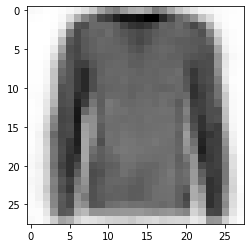

In [1]:
from Plot import *
from FashionDataloader import *
from Sampling import *

In [ ]:
#plot_latent_space_with_labels
NUM_CLASSES = 10
DATALOADER = get_FashionMNIST_dataloaders(18)
ENCODING_FN = model.encoding_fn
DEVICE = torch.device(f'cuda: if torch.cuda.is_available() else 'cpu')



In [ ]:
#plot_images_sampled_from_vae
MODEL = 
DEVICE = 
LATENT_SIZE = 
UNNORMALIZER =
NUM_IMAGES = 



In [ ]:
#plot_generated_images
DATALOADER = 
MODEL = 
DEVICE = 
UNNORMALIZER = 
NUM_IMAGES = 
FIG_SIZE = 
MODEL_TYPE = 


